# Linear and Logistic Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

## Importing the dataset

In [2]:
dataset=pd.read_csv('HRV.csv')

In [3]:
dataset.head()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,285.0,130.0,84.0,23.10,85.0,85.0,0


## Dataset Preprocessing

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4234 entries, 0 to 4233
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4234 non-null   int64  
 1   age            4234 non-null   int64  
 2   currentSmoker  4234 non-null   int64  
 3   totChol        4184 non-null   float64
 4   sysBP          4234 non-null   float64
 5   diaBP          4234 non-null   float64
 6   BMI            4215 non-null   float64
 7   heartRate      4233 non-null   float64
 8   glucose        3847 non-null   float64
 9   TenYearCHD     4234 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 330.9 KB


In [5]:
dataset.isnull().sum()

male               0
age                0
currentSmoker      0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          387
TenYearCHD         0
dtype: int64

In [6]:
totChol_median=dataset["totChol"].median()
BMI_median=dataset['BMI'].median()
heartRate_median=dataset['heartRate'].median()
glucose_median=dataset['glucose'].median()

In [7]:
dataset['totChol'].fillna(totChol_median, inplace=True)
dataset['BMI'].fillna(BMI_median, inplace=True)
dataset['heartRate'].fillna(heartRate_median, inplace=True)
dataset['glucose'].fillna(glucose_median, inplace=True)

In [8]:
dataset.isnull().sum()

male             0
age              0
currentSmoker    0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
TenYearCHD       0
dtype: int64

## A. Linear Regression - Create a model to predict the cholestrol level of a person

### Create independent and dependent variables to predict 

In [9]:
X=dataset.drop('totChol', axis=1)

In [10]:
y=dataset[['totChol']]

## Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.20, random_state=42)

## Training the Linear Regression model 

In [12]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train.values, y_train)

LinearRegression()

## Model performance check- R Square and RMSE score

In [13]:
print("Coerfficients", regressor.coef_)

Coerfficients [[-6.10835121e+00  1.20727781e+00  3.74471801e+00  4.49745487e-02
   2.63122919e-01  5.60529818e-01  2.94535793e-01  5.61151792e-03
   6.57240877e-01]]


In [14]:
print("Intercept", regressor.intercept_)

Intercept [112.88165673]


In [15]:
y_pred=regressor.predict(X_test.values)

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
print(f"r2 score: {r2_score(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

r2 score: 0.09
MSE: 1705.89
RMSE: 41.30


## Predicting new results where the actual results are given
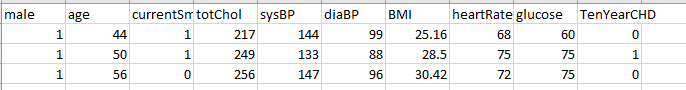

In [17]:
# case 1 actual 217
print(f'Predicted totChol: {regressor.predict([[1,44,1,144,99,25.16,68,60,0]])}')

Predicted totChol: [[230.63180653]]


In [18]:
# case 2 actual 249
print(f'Predicted totChol: {regressor.predict([[1,50,1,133,88,28.5,75,75,1]])}')

Predicted totChol: [[239.16173506]]


In [19]:
# case 3 actual 256
print(f'Predicted totChol: {regressor.predict([[1,56,0,147,96,30.42,72,75,0]])}')

Predicted totChol: [[244.93067996]]


## B. Logistic Regression - Create a model to predict the 10 year risk of coronary heart disease CHD of a person

### Create independent and dependent variables to predict

In [20]:
X=dataset.drop('TenYearCHD', axis=1)

In [21]:
y=dataset[['TenYearCHD']]

In [22]:
X.sample()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose
3552,0,55,1,265.0,154.0,87.0,20.92,96.0,66.0


## Splitting the dataset into the Training set and Test set

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.2, random_state=42)

## Training the Logistic Regression model 

In [24]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=1000)
classifier.fit(X_train.values, y_train.values.ravel())

LogisticRegression(max_iter=1000)

### Model Performance check using Confusion matrix, Confusion matrix display and classification report

In [25]:
y_pred=classifier.predict(X_test.values)

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[730   5]
 [108   4]]


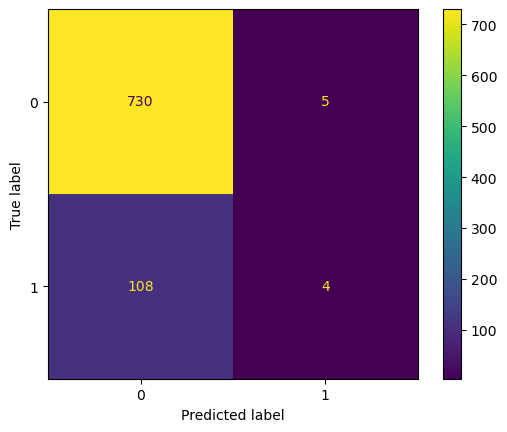

In [27]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, 
                            display_labels=classifier.classes_)
disp.plot()
plt.show()

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       735
           1       0.44      0.04      0.07       112

    accuracy                           0.87       847
   macro avg       0.66      0.51      0.50       847
weighted avg       0.81      0.87      0.81       847



### Discuss the results

- True negative (actually not at risk for coronary heart disease, predicted not at risk for coronary heart disease) = 730
- True positive (actually at risk for coroary heart disease, predicted at risk for coroary heart disease) = 4
- false positive (actually not at risk for coronary heart disease, predicted at risk for coronary heart disease) = 5
- false negative (actually at risk for coronary heart disease, predicted not at risk for coronary heart disease) = 108

## Predicting new results where the actual results are given
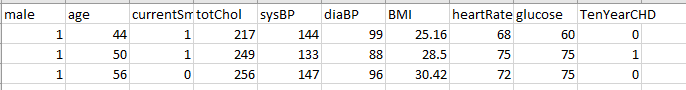

In [32]:
classifier.predict([[1,44,1,217,144,99,25.16,68,60]]) # predicted same as actual, not at risk

array([0], dtype=int64)

In [33]:
classifier.predict([[1,50,1,249,133,88,28.5,75,75]]) # predicted not same as actual, person is at risk but the prediction says he ist

array([0], dtype=int64)

In [34]:
classifier.predict([[1,56,0,256,147,99,30.42,72,75]]) # predicted same as acutal , not at risk

array([0], dtype=int64)

### Summary

Our Linear regression model had an r^2 score of 0.09 meaning that our model did not fit well with the input data. The linear regression model had an RMSE score of 41.30 which is relatively good. This measures the average difference between values predicted by a model and the actual values which gives gives a relatively accurate predicition. 

Our Logisitic regression model was pretty sucessful. It had an f1 score of 0.93 (93%) for predicting if a patient was not at risk for conary heart disease in the next 10 years. This shows it could accurately predict if a patient was not at risk, however the value for the f1 score for predicitng if a patient was at risk was vastly different. That f1 score was 0.07 (7%) for predicting if a patient was at risk for conary heart disease in the next 10 years. Part of the reason for this could be due to having a relatively small sample of patients that were at risk compared to much bigger sample for patients who weren't at risk.  